# 1. 线性回归
## 1.1 简单例子

In [1]:
from sklearn import linear_model

In [2]:
X = [[0, 0], [1, 1], [2, 2]]
y = [0, 1, 2]

In [3]:
reg = linear_model.LinearRegression()
reg.fit (X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
reg.coef_

array([0.5, 0.5])

In [5]:
reg.predict([[3,3]])

array([3.])

## 1.2 糖尿病数据集

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# 载入数据集
diabetes = datasets.load_diabetes()

In [9]:
# 只取第三个属性进行一元回归
diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [10]:
# 划分训练集和测试集
# 对特征进行划分
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# 对标签进行划分
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [11]:
# 创建模型对象
regr = linear_model.LinearRegression()

# 在训练集上训练模型
regr.fit(diabetes_X_train, diabetes_y_train)

# 在测试集上测试
diabetes_y_pred = regr.predict(diabetes_X_test)

In [12]:
# 查看回归系数
print('Coefficients: \n', regr.coef_)
# MSE
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# 解释方差R^2
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


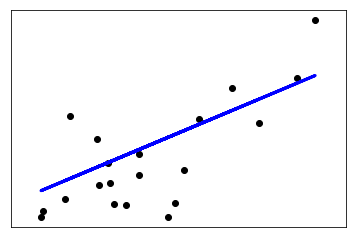

In [13]:
# 绘图查看预测结果
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# 2. 回归树

## 2.1 简单例子

In [14]:
from sklearn import tree

In [15]:
X = [[0, 0], [1, 1], [2, 2]]
y = [0, 1, 2]

In [16]:
dt_reg_test = tree.DecisionTreeRegressor()

In [17]:
dt_reg_test = dt_reg_test.fit(X, y)

In [18]:
dt_reg_test.predict([[1, 1]])

array([1.])

## 2.2 生成的随机数据集

In [19]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [20]:
# 生成数据集，并加入随机误差
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [21]:
# 用不同参数，分别拟合模型
dt_regr_1 = DecisionTreeRegressor(max_depth=2)
dt_regr_2 = DecisionTreeRegressor(max_depth=5)
dt_regr_1.fit(X, y)
dt_regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [22]:
# 分别进行模型预测
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = dt_regr_1.predict(X_test)
y_2 = dt_regr_2.predict(X_test)

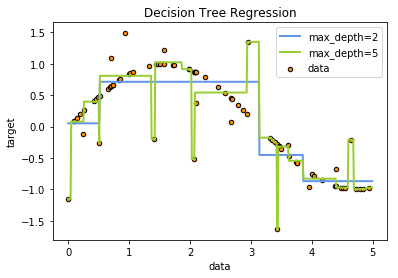

In [23]:
# 绘制结果
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# 3. k近邻回归

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [25]:
# 生成样本数据，并加入随机误差
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# 加入随机误差
y[::5] += 1 * (0.5 - np.random.rand(8))

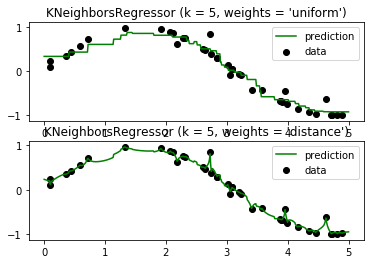

In [26]:
# 拟合模型，并画图对比
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % 
              (n_neighbors,weights))

plt.show()